In [24]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.interfaces.opal import opal_to_data

In [25]:
def opal_to_pmd(h5):
    data = opal_to_data(h5)
    return ParticleGroup(data=data)

In [32]:
final_pmd_10_nc_csr_on = opal_to_pmd(h5py.File('OPAL/lattice_eex_10_nc_csr_on.h5', 'r')['Step#221'])
final_pmd_10_nc_csr_off = opal_to_pmd(h5py.File('OPAL/lattice_eex_10_nc_csr_off.h5', 'r')['Step#221'])
final_pmd_100_nc_csr_on = opal_to_pmd(h5py.File('OPAL/lattice_eex_100_nc_csr_on.h5', 'r')['Step#221'])
final_pmd_100_nc_csr_off = opal_to_pmd(h5py.File('OPAL/lattice_eex_100_nc_csr_off.h5', 'r')['Step#221'])

In [33]:
def get_p0c(pmd):
    return pmd.pz.mean()

def center_pmd(pmd):
    pmd.x = pmd.x - pmd.x.mean()
    pmd.y = pmd.y - pmd.y.mean()
    pmd.z = pmd.z - pmd.z.mean()

In [38]:
p0c=43.4e6

In [40]:
center_pmd(final_pmd_10_nc_csr_on)
center_pmd(final_pmd_100_nc_csr_on)
center_pmd(final_pmd_10_nc_csr_off)
center_pmd(final_pmd_100_nc_csr_off)

In [41]:
from bmadx.pmd_utils import openpmd_to_bmadx_beam
beam_10_nc_csr_on = openpmd_to_bmadx_beam(final_pmd_10_nc_csr_on, p0c=p0c)
beam_100_nc_csr_on = openpmd_to_bmadx_beam(final_pmd_100_nc_csr_off, p0c=p0c)
beam_10_nc_csr_off = openpmd_to_bmadx_beam(final_pmd_10_nc_csr_on, p0c=p0c)
beam_100_nc_csr_off = openpmd_to_bmadx_beam(final_pmd_100_nc_csr_off, p0c=p0c)

In [42]:
def get_slice_pz(beam):
    pz_initial = beam.pz.mean() -  2*beam.pz.std()
    pz_final = beam.pz.mean() +  2*beam.pz.std()
    d_pz = 2*final_pmd_100_nc_csr_on['pz'].std()/10

In [106]:
def slice_beam(beam, n_slices=10):
    pz_initial = beam.pz.mean() -  2*beam.pz.std()
    pz_final = beam.pz.mean() +  2*beam.pz.std()
    d_pz = 4*beam.pz.std()/n_slices
    slice_x = [None] * n_slices
    slice_px = [None] * n_slices
    for i in range(n_slices):
        pz_i = pz_initial + i*d_pz
        pz_f = pz_i + d_pz
        indices = np.argwhere((beam.pz > pz_i) & (beam.pz < pz_f))
        slice_x[i] = beam.x[indices[:,0]]
        slice_px[i] = beam.px[indices[:,0]] 
        print(indices.shape)
    return slice_x, slice_px

In [107]:
slice_x_100_nc_csr_on[9]

array([-0.02289721])

In [108]:
slice_x_10_nc_csr_on, slice_px_10_nc_csr_on = slice_beam(final_pmd_10_nc_csr_on)
slice_x_100_nc_csr_on, slice_px_100_nc_csr_on = slice_beam(final_pmd_100_nc_csr_off)
slice_x_10_nc_csr_off, slice_px_10_nc_csr_off = slice_beam(final_pmd_100_nc_csr_on)
slice_x_100_nc_csr_off, slice_px_100_nc_csr_off = slice_beam(final_pmd_100_nc_csr_off)

(3526, 1)
(5859, 1)
(8986, 1)
(12160, 1)
(15086, 1)
(15483, 1)
(13045, 1)
(9572, 1)
(6073, 1)
(3768, 1)
(3472, 1)
(5536, 1)
(8322, 1)
(11492, 1)
(15040, 1)
(16154, 1)
(14116, 1)
(9704, 1)
(5943, 1)
(3500, 1)
(2861, 1)
(7153, 1)
(13773, 1)
(15680, 1)
(14122, 1)
(11253, 1)
(10420, 1)
(8711, 1)
(6550, 1)
(4918, 1)
(3472, 1)
(5536, 1)
(8322, 1)
(11492, 1)
(15040, 1)
(16154, 1)
(14116, 1)
(9704, 1)
(5943, 1)
(3500, 1)


slice_x_10_nc_csr_on, slice_px_10_nc_csr_on = slice_beam(beam_10_nc_csr_on)
slice_x_100_nc_csr_on, slice_px_100_nc_csr_on = slice_beam(beam_100_nc_csr_on)
slice_x_10_nc_csr_off, slice_px_10_nc_csr_off = slice_beam(beam_10_nc_csr_off)
slice_x_100_nc_csr_off, slice_px_100_nc_csr_off = slice_beam(beam_100_nc_csr_off)

In [111]:
def plot_slices(slices_x, slices_px, rng=None):
    fig, ax = plt.subplots(len(slices_px), figsize=(10, 20))
    for i in range(len(slices_px)):
        ax[i].hist2d(slices_x[i], slices_px[i], bins=50, range=rng)
        #ax[i].set_aspect('equal')
    plt.show()

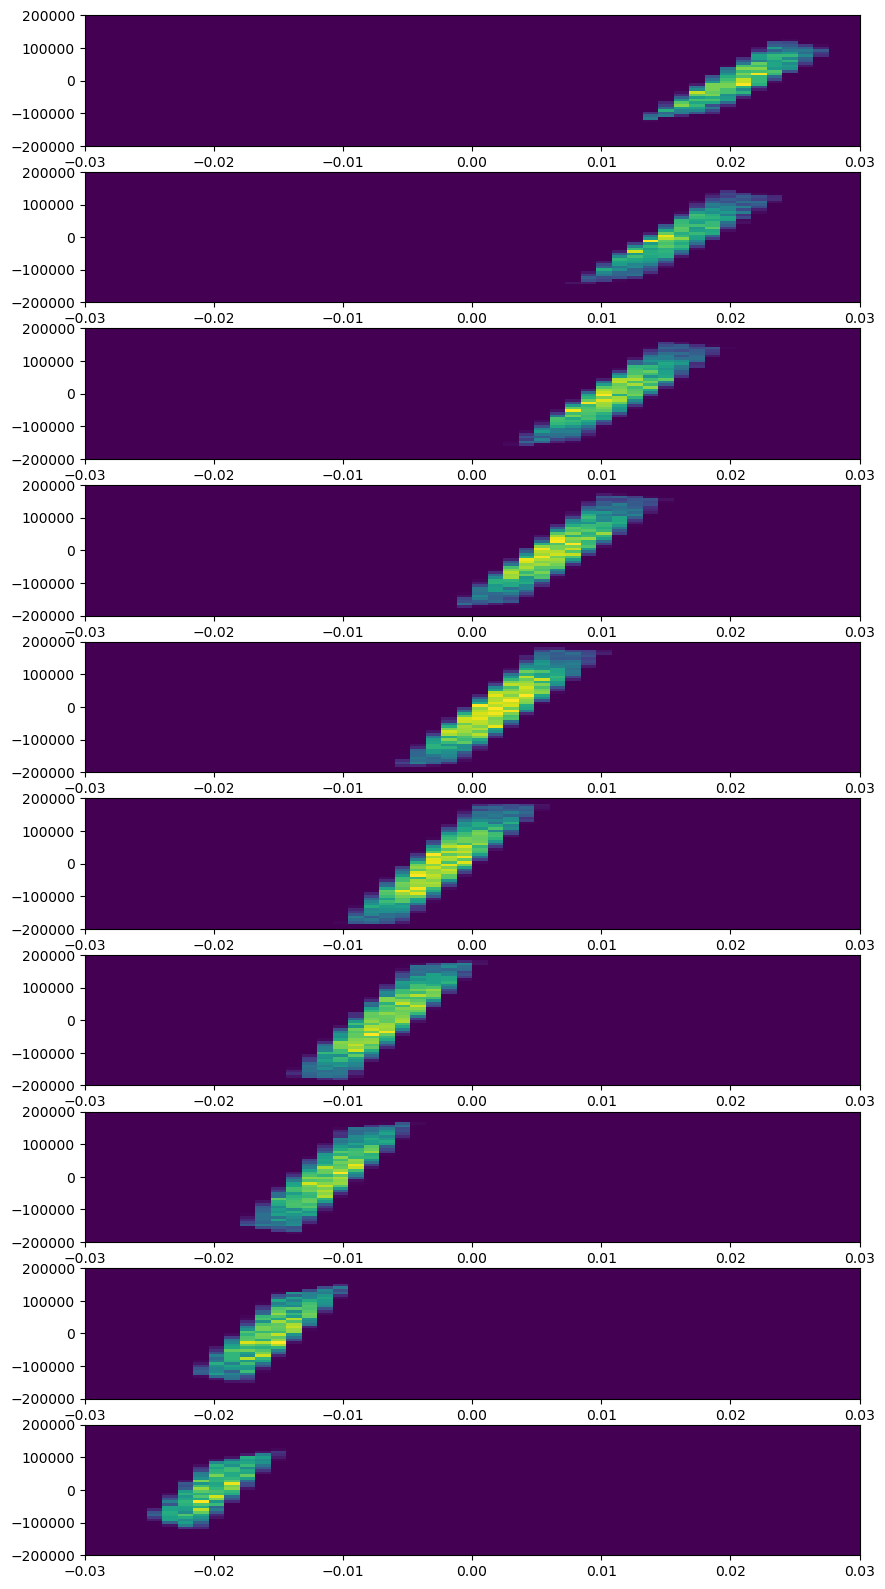

In [129]:
plot_slices(slice_x_100_nc_csr_on, slice_px_100_nc_csr_on, rng=[[-0.03, 0.03],[-2e5, 2e5]])

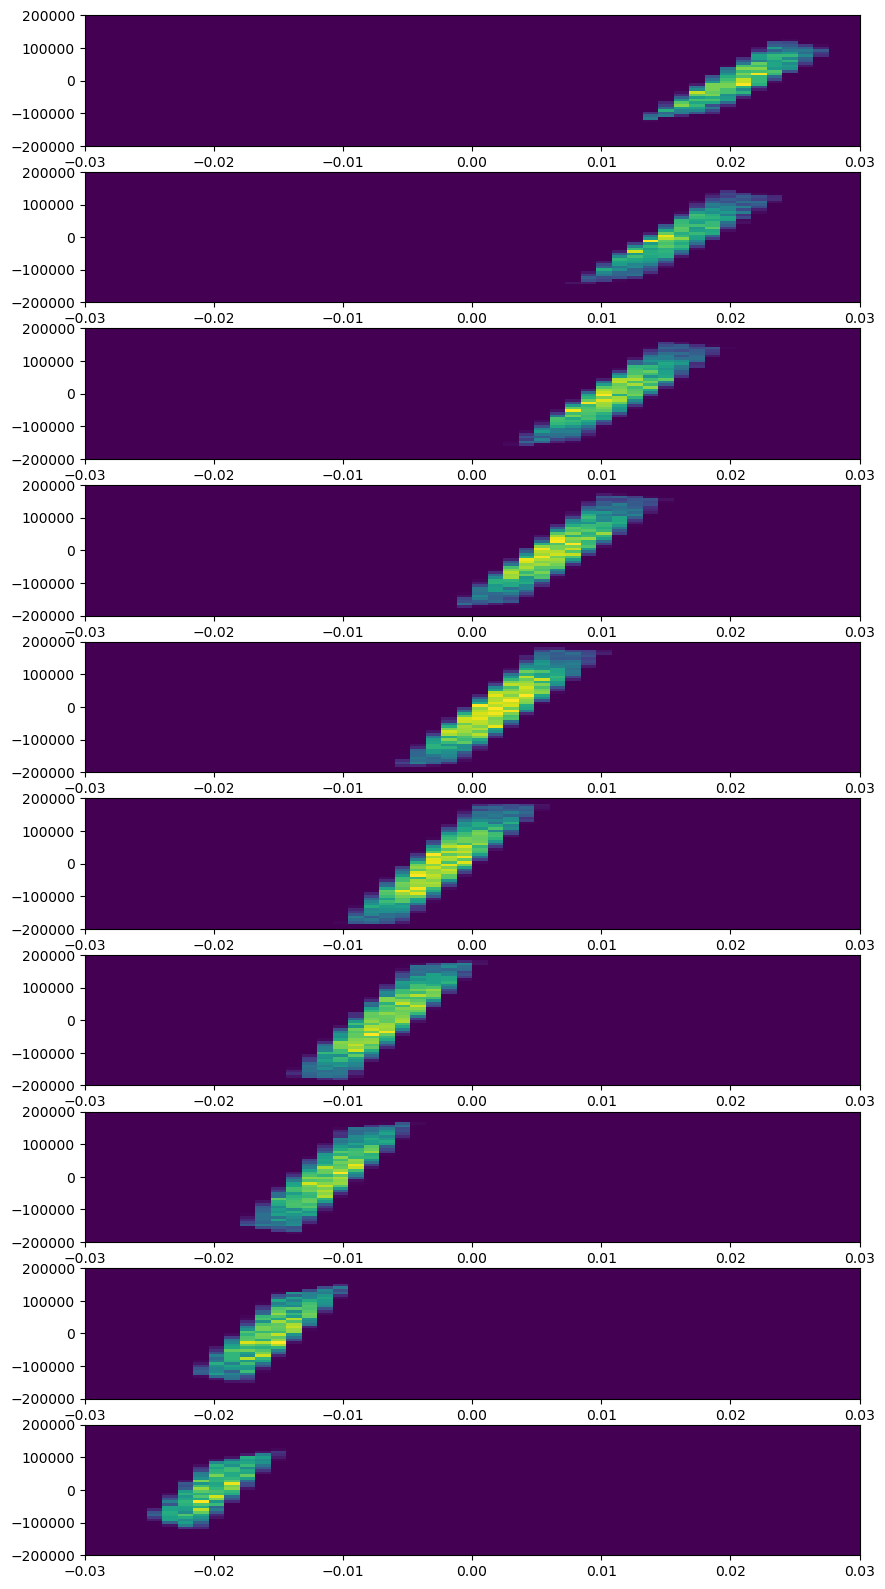

In [130]:
plot_slices(slice_x_100_nc_csr_off, slice_px_100_nc_csr_off, rng=[[-0.03, 0.03],[-2e5, 2e5]])

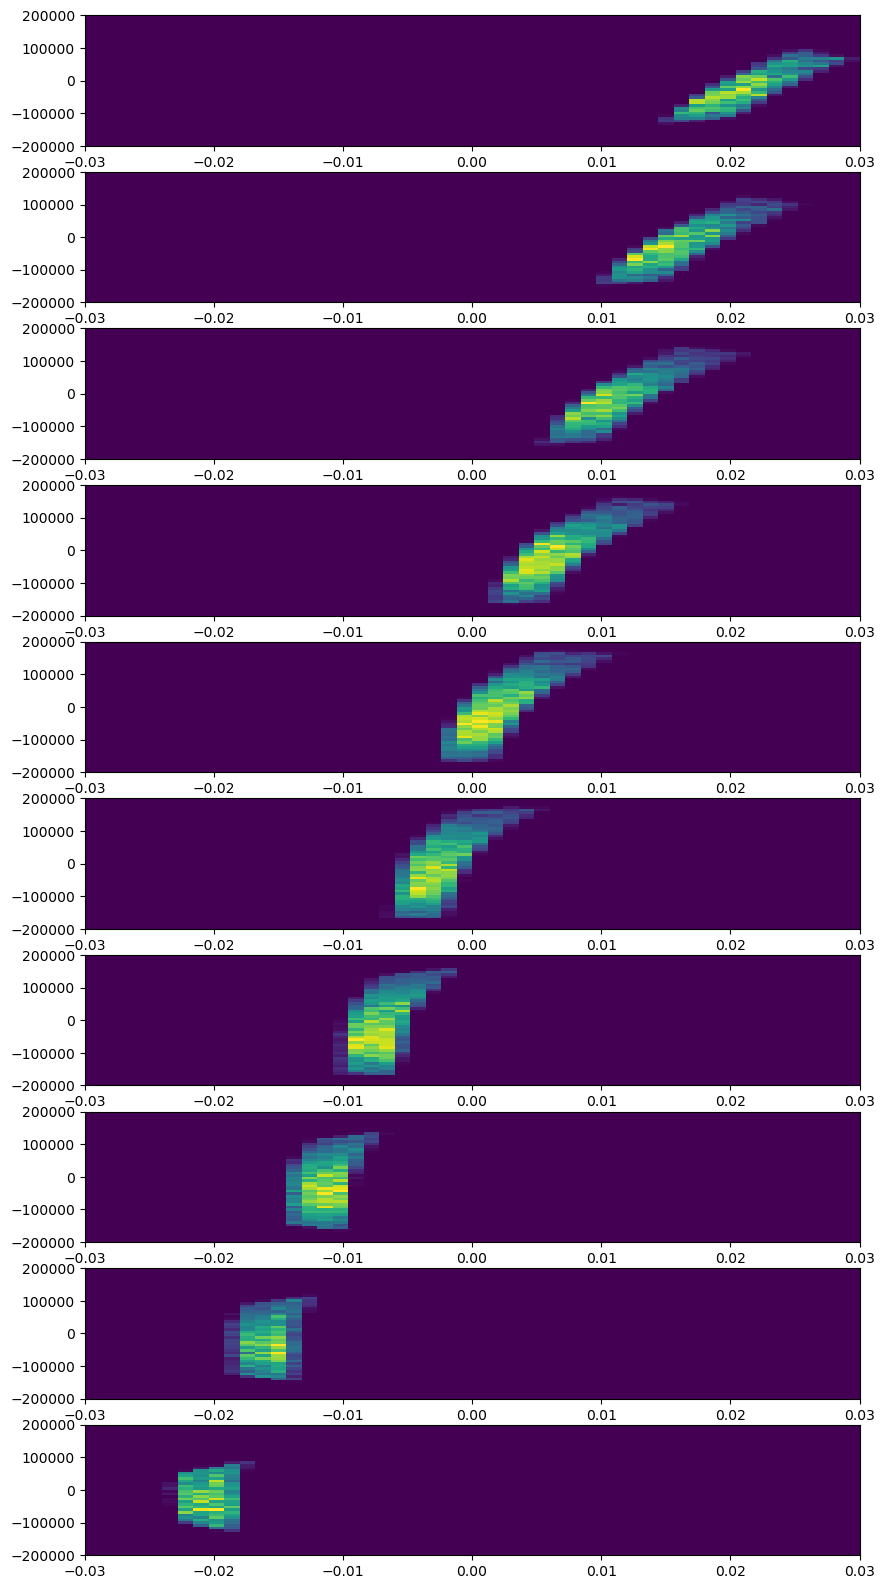

In [131]:
plot_slices(slice_x_10_nc_csr_on, slice_px_10_nc_csr_on, rng=[[-0.03, 0.03],[-2e5, 2e5]])

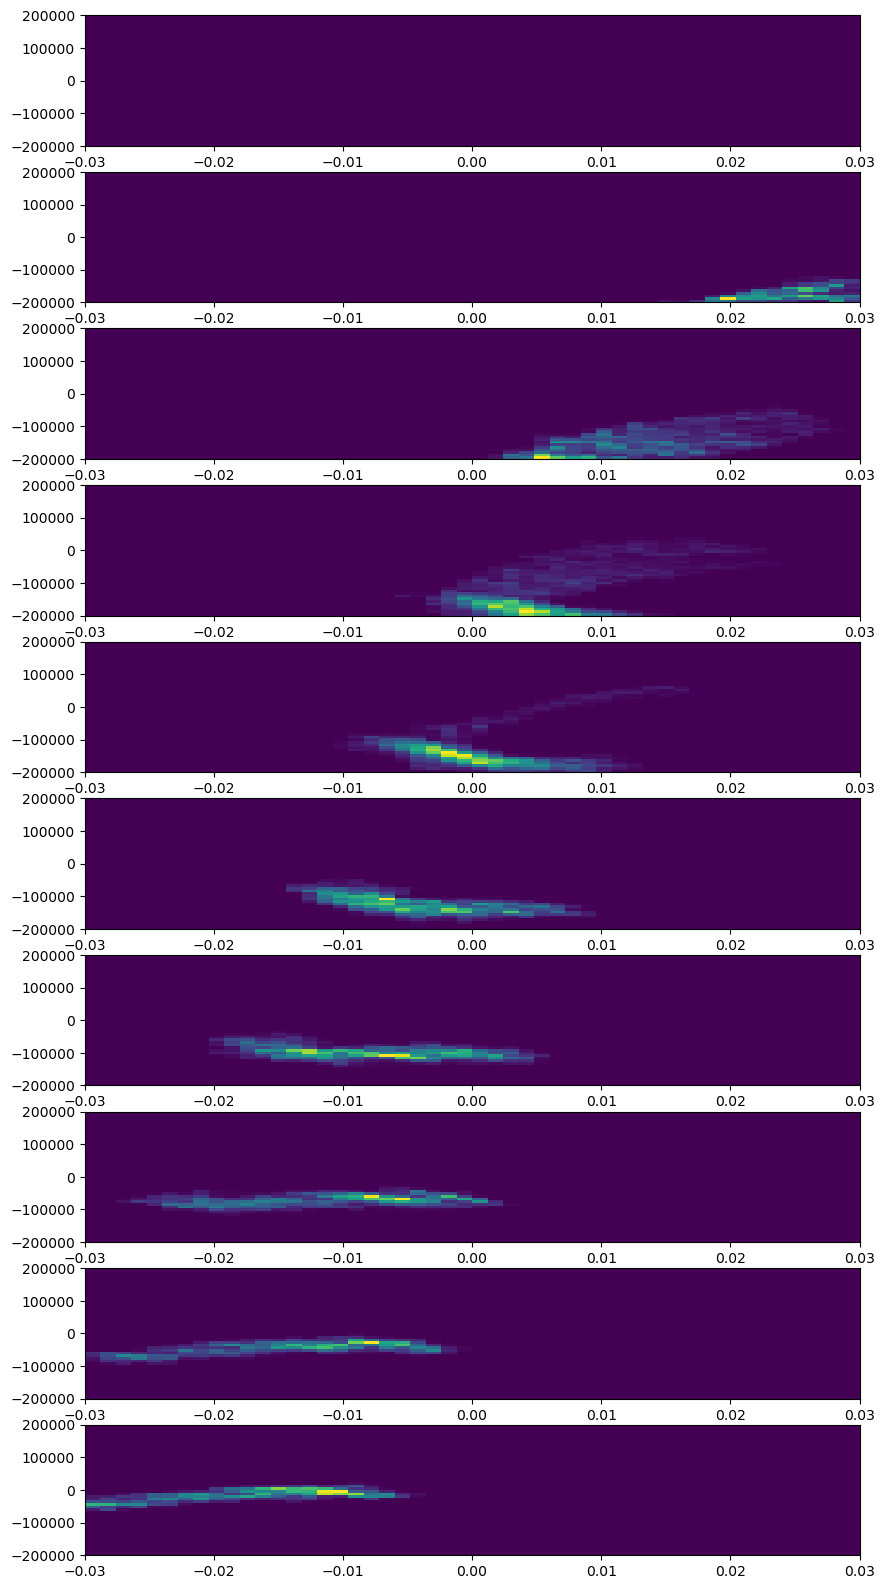

In [132]:
plot_slices(slice_x_10_nc_csr_off, slice_px_10_nc_csr_off, rng=[[-0.03, 0.03],[-2e5, 2e5]])

In [71]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from phase_space_reconstruction.virtual.beamlines import quadlet_tdc_bend
from phase_space_reconstruction.virtual.scans import run_3d_scan, run_t_scan
from phase_space_reconstruction.diagnostics import ImageDiagnostic
from phase_space_reconstruction.visualization import plot_3d_scan_data
from phase_space_reconstruction.train import train_3d_scan
from bmadx.distgen_utils import create_beam
from bmadx.plot import plot_projections
from bmadx.constants import PI

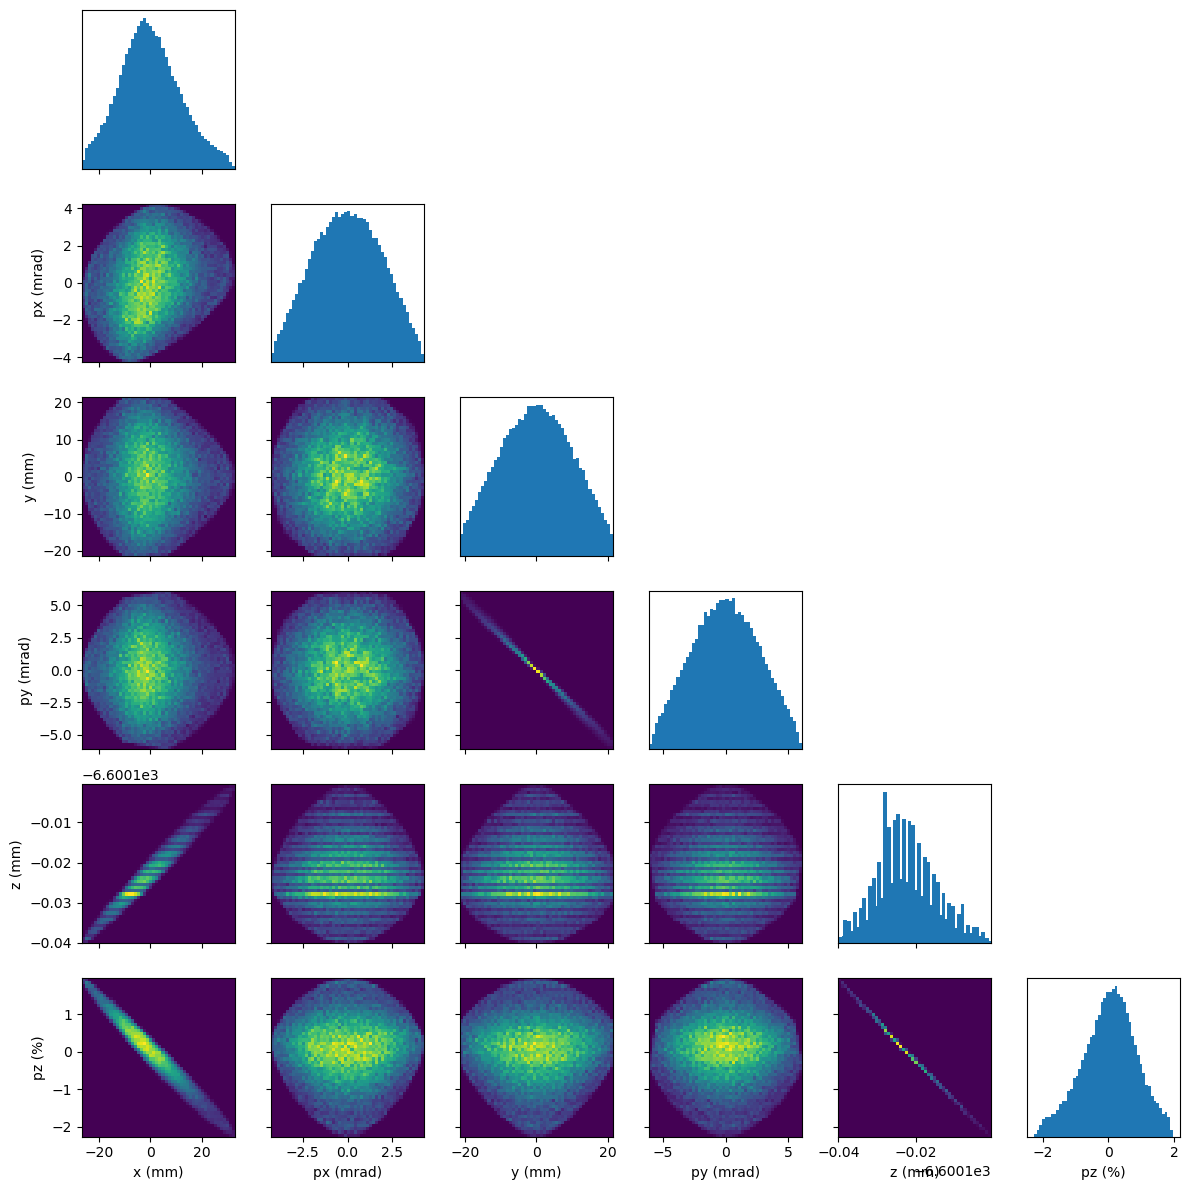

In [72]:
#plot gt beam
lims = np.array([[-15e-3, 15e-3],
                 [-15e-3, 15e-3],
                 [-15e-3, 15e-3],
                 [-15e-3, 15e-3],
                 [-15e-3, 15e-3],
                 [-10e-2, 10e-2]]) 
fig, ax = plot_projections(
    beam_100_nc_csr_on.numpy_particles(),
    #custom_lims = lims,
    #background = 0
)
plt.show()

In [73]:
# triplet params obtained from triplet-opt.ipynb
k1 = 7.570125
k2 = -15.704693
k3 = 1.0
#k1 = 0
#k2 = 0
#k3 = 0

In [74]:
# diagnostic beamline:
lattice = quadlet_tdc_bend(p0c=p0c, dipole_on=False)
lattice.elements[0].K1.data = torch.tensor(k1)
lattice.elements[2].K1.data = torch.tensor(k2)
lattice.elements[4].K1.data = torch.tensor(k3)

# Scan over quad strength, tdc on/off and dipole on/off
scan_ids = [6, 8, 10] 
n_ks = 5
ks = torch.linspace(-10, 10, n_ks) # quad ks
vs = torch.tensor([0, 5e6]) # TDC off/on
gs = torch.tensor([2.22e-16, 20.0*PI/180.0/0.365]) # dipole off/on
train_params = torch.stack(torch.meshgrid(ks, vs, gs, indexing='ij'))
print(train_params.shape)
print(train_params.unsqueeze(-1).shape)

# create diagnostic screen: 
bins = torch.linspace(-200, 200, 200) * 1e-3
bandwidth = (bins[1]-bins[0]) / 2
screen = ImageDiagnostic(bins, bins, bandwidth)

torch.Size([3, 5, 2, 2])
torch.Size([3, 5, 2, 2, 1])


In [76]:
# generate and save train and test datasets
train_dset_3d_scan = run_3d_scan(
    beam_100_nc_csr_on, 
    lattice,
    screen, 
    ks, vs, gs,
    ids = scan_ids
    )

print(train_dset_3d_scan.params.shape)
print(train_dset_3d_scan.images.shape)

torch.Size([20, 3, 1])
torch.Size([20, 1, 200, 200])


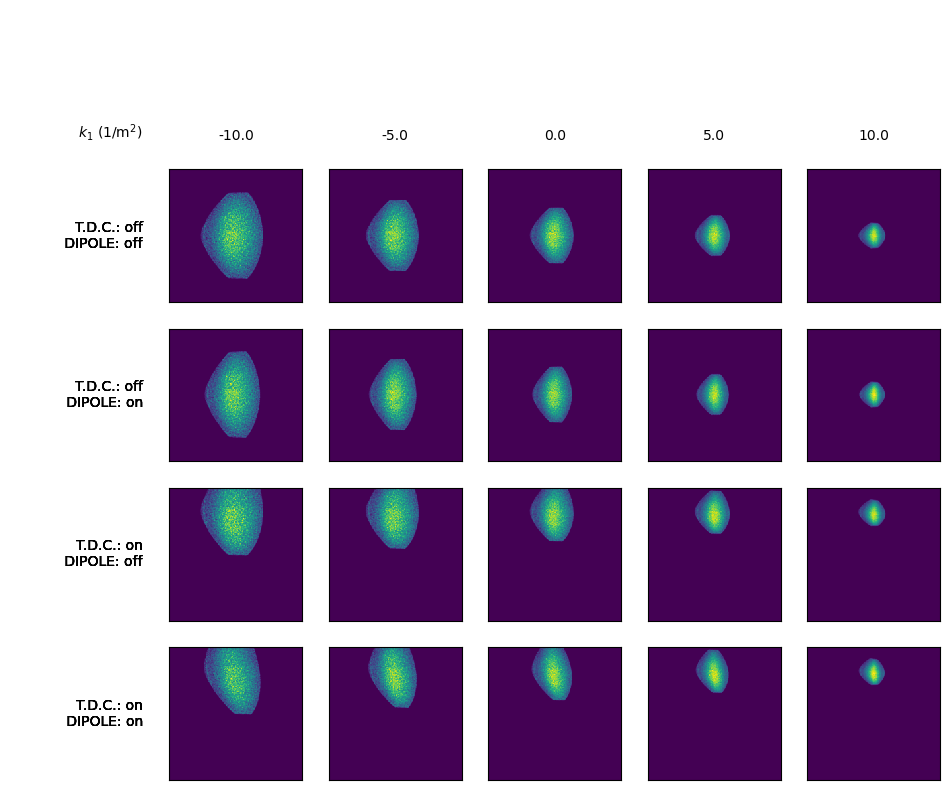

In [77]:
fig, ax = plot_3d_scan_data(train_dset_3d_scan)
plt.show()

In [ ]:
%%time

# training with 4 gpus
pred_beam_3d_scan_10_000 = train_3d_scan(
    train_dset_3d_scan, 
    lattice, 
    p0c, 
    screen,
    ids = scan_ids,
    n_epochs = 1_000, 
    n_particles = 10_000, 
    device = 'cuda'
    )